In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

input_data = pd.read_csv('training_data.csv')
input_data['increase_stock_binary'] = input_data['increase_stock'].map({'low_bike_demand': 0, 'high_bike_demand': 1})
input_data.drop('increase_stock', axis=1, inplace=True)
input_data



,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock_binary
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.000,0,0.0,16.3,31.6,16.0,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.000,0,0.0,23.9,85.7,16.0,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.000,0,0.0,0.0,81.1,16.0,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.000,0,0.0,19.2,0.0,16.0,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.000,0,0.0,10.5,44.6,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,3,5,6,0,0,1,21.5,19.4,87.68,0.000,0,0.0,10.6,24.4,16.0,0
1596,14,0,6,0,1,1,23.2,20.1,82.43,2.217,0,0.0,9.8,92.1,10.4,0
1597,13,0,3,0,1,1,13.9,-2.2,32.93,0.000,0,2.0,18.2,79.3,16.0,0
1598,14,5,3,0,0,1,11.7,-9.3,22.09,0.000,0,0.0,5.8,24.4,16.0,1


In [28]:
# Replace 'desired_column' with the actual name of the column you want
day_of_week_data = input_data['day_of_week']
month_data = input_data['month']
hour_of_day_data = input_data['hour_of_day']
increase_stock_binary_data = input_data['increase_stock_binary']
weekday_data = input_data['weekday']
summertime_data = input_data['summertime']
weekday_data = input_data['weekday']
holiday_data = input_data['holiday']


weekday_high_total = np.zeros(2)
holyday_high_total = np.zeros(2)
weekend_high_total = np.zeros(2)
weekday_weekend_holyday_procentage = np.zeros(3)
days_high = np.zeros(7)
months_high = np.zeros(13)
hours_high = np.zeros(24)
days_low = np.zeros(7)
months_low = np.zeros(13)
hours_low = np.zeros(24)
time_hours = np.arange(0,24)
days_total = np.zeros(7)
months_total = np.zeros(13)
hours_total = np.zeros(24)
name_for_days = ['Mon', 'Tues', 'Wednes', 'Thurs', 'Fri', 'Satur', 'Sun']
name_for_months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
name_weekday_holyday = ['Weekday', 'Weekend','Holiday']





for i in range(1600):

    current_day = day_of_week_data[i]
    current_month = month_data[i]
    current_hour = hour_of_day_data[i]
    
    days_total[current_day] += 1
    months_total[current_month] +=1
    hours_total[current_hour] += 1

    if weekday_data[i] == 1:
        weekday_high_total[1] +=1
    else:
         weekend_high_total[1] +=1

    if holiday_data[i] == 1:
            holyday_high_total[1] +=1



    if increase_stock_binary_data[i] == 1:
        
        days_high[current_day] += 1
        months_high[current_month] +=1
        hours_high[current_hour] += 1

        if weekday_data[i] == 1:
            weekday_high_total[0] +=1
        else:
            weekend_high_total[0] +=1

        if holiday_data[i] == 1:
                holyday_high_total[0] +=1


        

    else:
        
        days_low[current_day] += 1
        months_low[current_month] +=1
        hours_low[current_hour] += 1


days_high_procentage = 100 * days_high / days_total
months_high_procentage = 100 * months_high / months_total
hours_high_procentage = 100 * hours_high / hours_total

weekday_weekend_holyday_procentage[0] = 100 * weekday_high_total[0] / weekday_high_total[1]

weekday_weekend_holyday_procentage[1] = 100 * weekend_high_total[0] / weekend_high_total[1]

weekday_weekend_holyday_procentage[2] = 100 * holyday_high_total[0] / holyday_high_total[1]







C:\Users\axelo\AppData\Local\Temp\ipykernel_31212\3727706492.py:79: RuntimeWarning: invalid value encountered in true_divide
  months_high_procentage = 100 * months_high / months_total


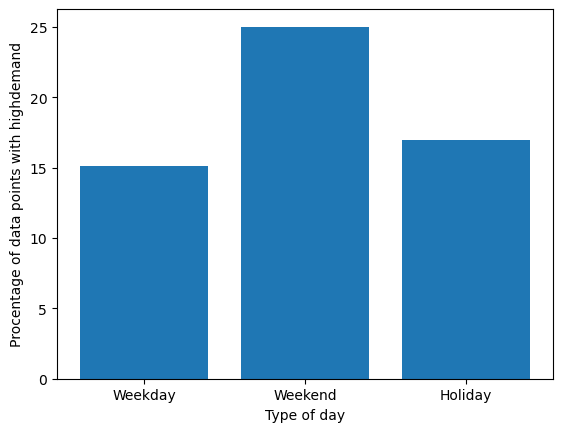

In [29]:
plt.bar(name_weekday_holyday, weekday_weekend_holyday_procentage)
plt.xlabel('Type of day')
plt.ylabel('Procentage of data points with highdemand')
plt.show()

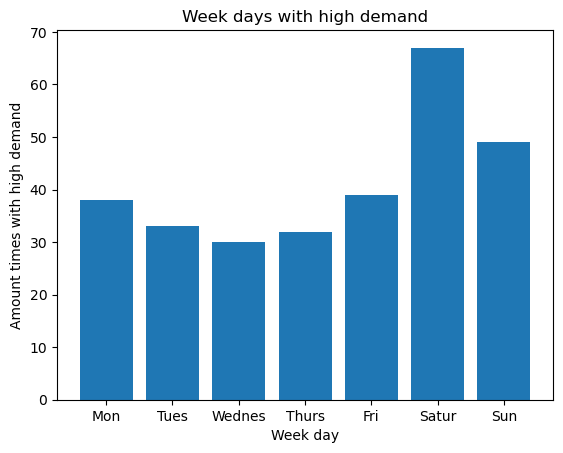

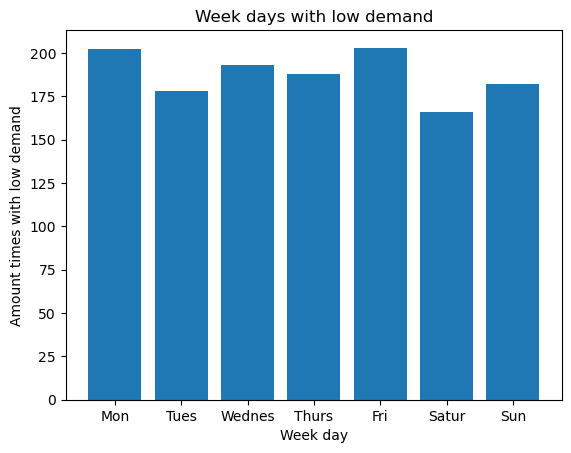

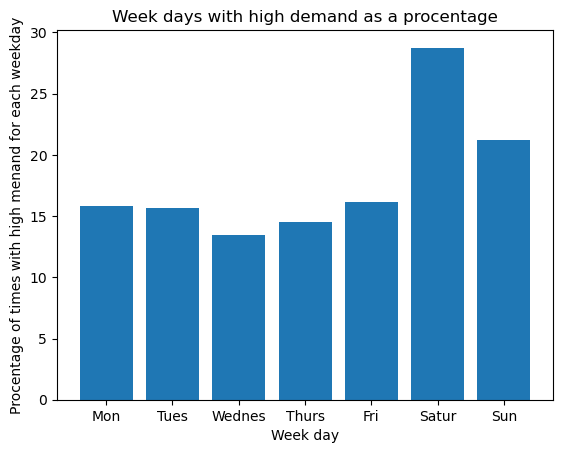

In [30]:
plt.bar(name_for_days, days_high)
plt.xlabel('Week day')
plt.ylabel('Amount times with high demand')
plt.title('Week days with high demand')
plt.show()

plt.bar(name_for_days, days_low)
plt.xlabel('Week day')
plt.ylabel('Amount times with low demand')
plt.title('Week days with low demand')
plt.show()

plt.bar(name_for_days, days_high_procentage)
plt.xlabel('Week day')
plt.ylabel('Procentage of times with high menand for each weekday')
plt.title('Week days with high demand as a procentage')
plt.savefig('high_demand_weekdays_procentage.png')
plt.show()

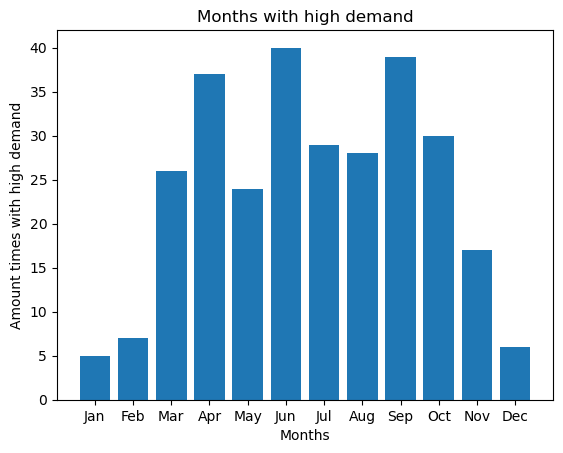

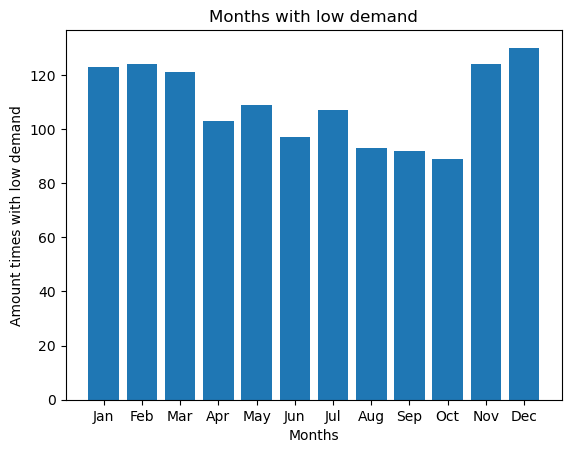

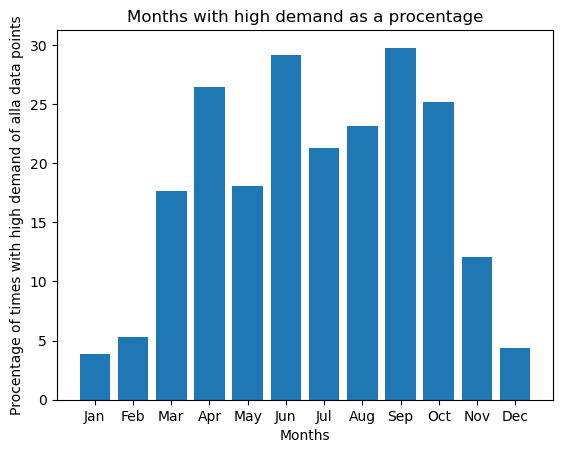

In [31]:
plt.bar(name_for_months, months_high[1:13])
plt.xlabel('Months')
plt.ylabel('Amount times with high demand')
plt.title('Months with high demand')
plt.show()

plt.bar(name_for_months, months_low[1:13])
plt.xlabel('Months')
plt.ylabel('Amount times with low demand')
plt.title('Months with low demand')
plt.show()

plt.bar(name_for_months, months_high_procentage[1:13])
plt.xlabel('Months')
plt.ylabel('Procentage of times with high demand of alla data points')
plt.title('Months with high demand as a procentage')
plt.savefig('high_demand_month_procentage.png')
plt.show()

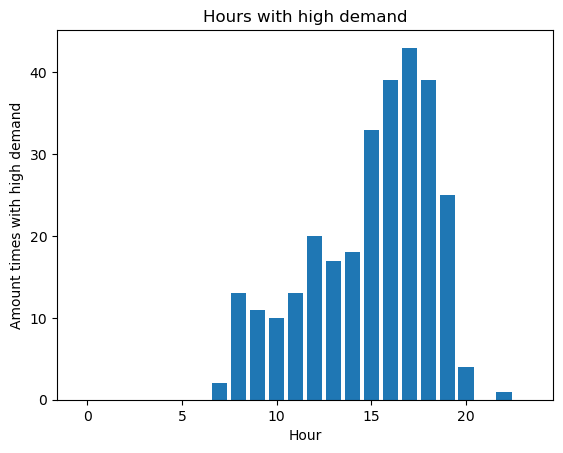

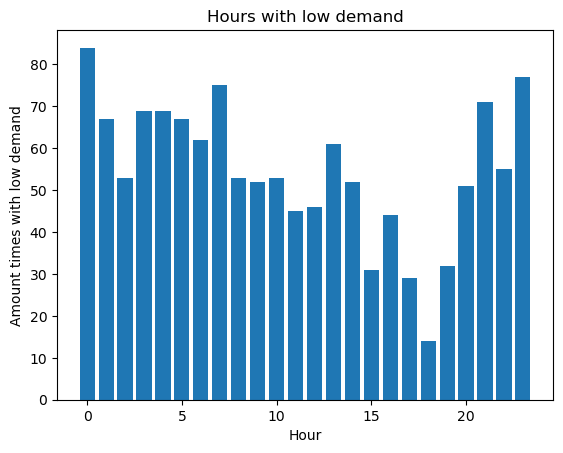

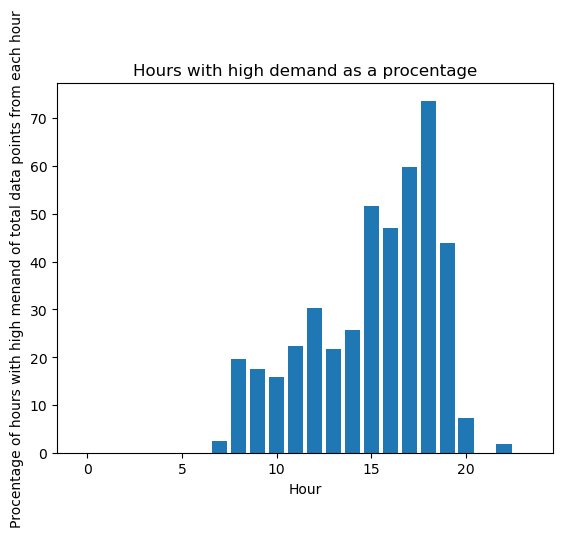

In [32]:
plt.bar(time_hours, hours_high)
plt.xlabel('Hour')
plt.ylabel('Amount times with high demand')
plt.title('Hours with high demand')
plt.show()

plt.bar(time_hours, hours_low)
plt.xlabel('Hour')
plt.ylabel('Amount times with low demand')
plt.title('Hours with low demand')
plt.show()

plt.bar(time_hours, hours_high_procentage)
plt.xlabel('Hour')
plt.ylabel('Procentage of hours with high menand of total data points from each hour')
plt.title('Hours with high demand as a procentage')
plt.savefig('high_demand_hour_procentage.png')
plt.show()



In [33]:
# Create the target vector
# 0 - low_bike_demand
# 1 - high_bike_demand

target_vect = dftrain.loc[:,'increase_stock'].to_numpy()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# One hot encoder for the data
enc = OneHotEncoder()
target_names = ['low_bike_demand','high_bike_demand']
target = enc.fit_transform(target_vect[:, np.newaxis]).toarray()

NameError: name 'dftrain' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV

X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, s=2);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
parameters = {'min_samples_split':[2, 4, 6, 8, 10], 
              'max_leaf_nodes':[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
              'max_depth':[5, 10, 15, 20, 25, 30]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters, scoring='accuracy', refit=True)
clf.fit(X_train, y_train)